<a href="https://colab.research.google.com/github/Dannap77/Todos_a_la_U/blob/main/Actividad_Dataframes_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Actividad Dataframes con pandas*** 🐼




In [ ]:
#importando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
import seaborn as sns

In [ ]:
#instalando la API
!pip install sodapy

In [ ]:
#URL
client = Socrata("www.datos.gov.co", None)
results = client.get("32sa-8pi3")

#Asignado al df
df_dataset = pd.DataFrame.from_records(results)

In [ ]:
#convertir la columna valor a tipo numerico
df_dataset['valor'] = pd.to_numeric(df_dataset['valor'],errors='coerce')

#calcular las medidas estadísticas
media = df_dataset['valor'].mean()
mediana = df_dataset['valor'].median()
desviacion_estandar = df_dataset['valor'].std()
maximo = df_dataset['valor'].max()
minimo = df_dataset['valor'].min()
rango = maximo - minimo

#imprimir los resultados
print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_estandar)
print("Máximo:", maximo)
print("Mínimo:", minimo)
print("Rango:", rango)


Media: 3042.3765099999996
Mediana: 2972.525
Desviación estándar: 730.6890057655628
Máximo: 5061.21
Mínimo: 1846.12
Rango: 3215.09


In [ ]:
#Resumen de datos numericos
df_dataset.describe()

,valor
count,1000.000000
mean,3042.376510
std,730.689006
min,1846.120000
25%,2500.497500
50%,2972.525000
75%,3646.340000
max,5061.210000


In [ ]:
#Presentar la información general del dataset
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valor          1000 non-null   float64
 1   unidad         1000 non-null   object 
 2   vigenciadesde  1000 non-null   object 
 3   vigenciahasta  1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


##Representaciones graficas 📈

#Gráfico de líneas
podemos observar como cambia el valor a medida que avanzamos en el tiempo. Cada punto en el gráfico representaría un valor específico correspondiente a una fecha determinada.

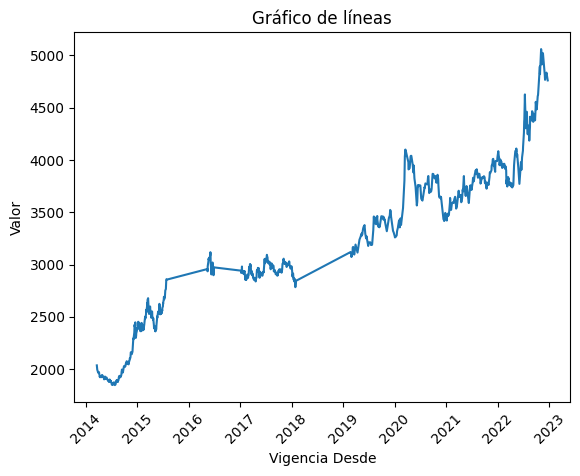

In [ ]:
# Convertir las columnas "vigenciadesde" y "valor" a tipo fecha/hora y numérico
df_dataset['vigenciadesde'] = pd.to_datetime(df_dataset['vigenciadesde'])
df_dataset['valor'] = pd.to_numeric(df_dataset['valor'], errors='coerce')

# Ordenar el DataFrame por la columna vigenciadesde
df_dataset = df_dataset.sort_values('vigenciadesde')

# Crear el gráfico de línea
plt.plot(df_dataset['vigenciadesde'], df_dataset['valor'])
plt.xlabel('Vigencia Desde')
plt.ylabel('Valor')
plt.title('Gráfico de líneas')

# Rotar las etiquetas
plt.xticks(rotation=45)
plt.show()


#Gráfico de histograma
Podemos observar la distribución de los valores y que nos permiten comprender mejor cómo se agrupan.

En el eje x del histograma se representan los intervalos o rangos de valores, mientras que en el eje y se muestra la frecuencia o conteo de valores que caen en cada intervalo.

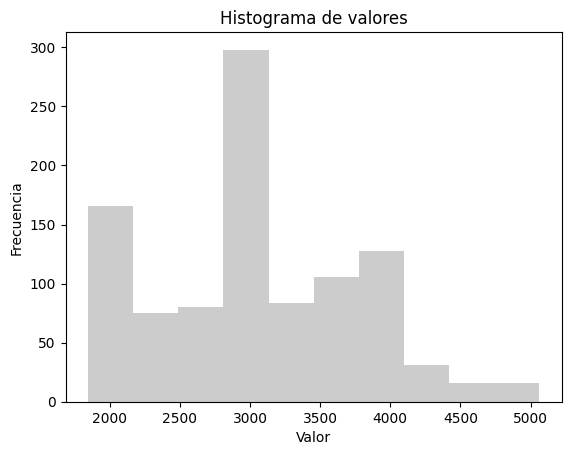

In [ ]:
#Gráfico de histograma

# Convertir la columna "valor" a tipo numérico
df_dataset['valor'] = pd.to_numeric(df_dataset['valor'], errors='coerce')

# Crear el gráfico de histograma
plt.hist(df_dataset['valor'], bins=10, color='#CCCCCC')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de valores')

# Mostrar el gráfico
plt.show()


##Dataset Datos Públicos Colombia 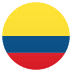

Dataset Agresiones por animales transmisores de rabia: https://www.datos.gov.co/Salud-y-Protecci-n-Social/AGRESIONES-POR-ANIMALES-TRANSMISORES-DE-RABIA/qpvx-dwrp

In [ ]:
# Petición get
resultado = client.get("qpvx-dwrp")

#Convertir en DataFrame
animales_rabia= pd.DataFrame.from_records(resultado)
animales_rabia

,codigo_evento,semana,a_o,edad,sexo,area,tipo_seguridad_social,nombre_del_evento
0,300,24,2.02,6,M,RURAL,CONTRIBUTIVO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...
1,300,30,2.02,13,M,RURAL,SUBSIDIADO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...
2,300,37,2.02,68,M,RURAL,SUBSIDIADO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...
3,300,1,2.01,32,M,RURAL DISPERSO,SUBSIDIADO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...
4,300,2,2.01,3,F,RURAL DISPERSO,SUBSIDIADO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...
...,...,...,...,...,...,...,...,...
995,300,10,2.011,38,M,CENTRO POBLADO,CONTRIBUTIVO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...
996,300,10,2.011,10,M,RURAL DISPERSO,CONTRIBUTIVO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...
997,300,11,2.011,51,M,CABECERA MUNICIPAL,NO ASEGURADO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...
998,300,11,2.011,23,M,CABECERA MUNICIPAL,CONTRIBUTIVO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...


###*limpieza y transformación necesarias*

In [ ]:
animales_rabia = animales_rabia.rename(columns={'a_o': 'year'})
animales_rabia = animales_rabia.fillna(0)
animales_rabia['year'] = pd.to_numeric(animales_rabia['year'])
animales_rabia['edad'] = pd.to_numeric(animales_rabia['edad'])
animales_rabia['semana'] = pd.to_numeric(animales_rabia['semana'])

###*Presentación del dataset*


**CODIGO EVENTO**
Código en que se identifica el evento en salud publica

**SEMANA**
Numero de la semana epidemiológica

**AÑO**
Año del evento en salud publica

**EDAD**
Edad del paciente

**SEXO**
Sexo, Masculino o femenino

**AREA**
Área donde vive la persona

**TIPO SEGURIDAD SOCIAL**
Régimen de salud al que pertenece el usuario

In [ ]:
animales_rabia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   codigo_evento          1000 non-null   object 
 1   semana                 1000 non-null   int64  
 2   year                   1000 non-null   float64
 3   edad                   1000 non-null   int64  
 4   sexo                   1000 non-null   object 
 5   area                   1000 non-null   object 
 6   tipo_seguridad_social  1000 non-null   object 
 7   nombre_del_evento      1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [ ]:
print(animales_rabia.columns)

Index(['codigo_evento', 'semana', 'year', 'edad', 'sexo', 'area',
       'tipo_seguridad_social', 'nombre_del_evento'],
      dtype='object')


In [ ]:
# Cantidad de eventos por código
eventos_por_codigo = animales_rabia['codigo_evento'].value_counts()

# Estadísticas de la semana
estadisticas_semana = animales_rabia['semana'].describe()

# Estadísticas de edad
estadisticas_edad = animales_rabia['edad'].describe()

# Distribución de género
distribucion_genero = animales_rabia['sexo'].value_counts()

# Distribución de áreas
distribucion_areas = animales_rabia['area'].value_counts()

# Imprimir
print("Cantidad de eventos por código:")
print(eventos_por_codigo)

print("\nEstadísticas de la semana:")
print(estadisticas_semana)

print("\nEstadísticas de edad:")
print(estadisticas_edad)

print("\nDistribución de género:")
print(distribucion_genero)

print("\nDistribución de áreas:")
print(distribucion_areas)


Cantidad de eventos por código:
300    1000
Name: codigo_evento, dtype: int64

Estadísticas de la semana:
count    1000.00000
mean       25.02700
std        16.02364
min         1.00000
25%         9.00000
50%        24.00000
75%        40.00000
max        52.00000
Name: semana, dtype: float64

Estadísticas de edad:
count    1000.000000
mean       28.446000
std        22.019399
min         1.000000
25%        10.000000
50%        22.000000
75%        44.000000
max        87.000000
Name: edad, dtype: float64

Distribución de género:
M    574
F    426
Name: sexo, dtype: int64

Distribución de áreas:
CABECERA MUNICIPAL    633
CENTRO POBLADO        278
RURAL DISPERSO         86
RURAL                   3
Name: area, dtype: int64


# Gráfico de barras de la cantidad de eventos por código
*Este gráfico muestra la cantidad de eventos registrados para cada código, permite visualizar cuántos eventos se han registrado*




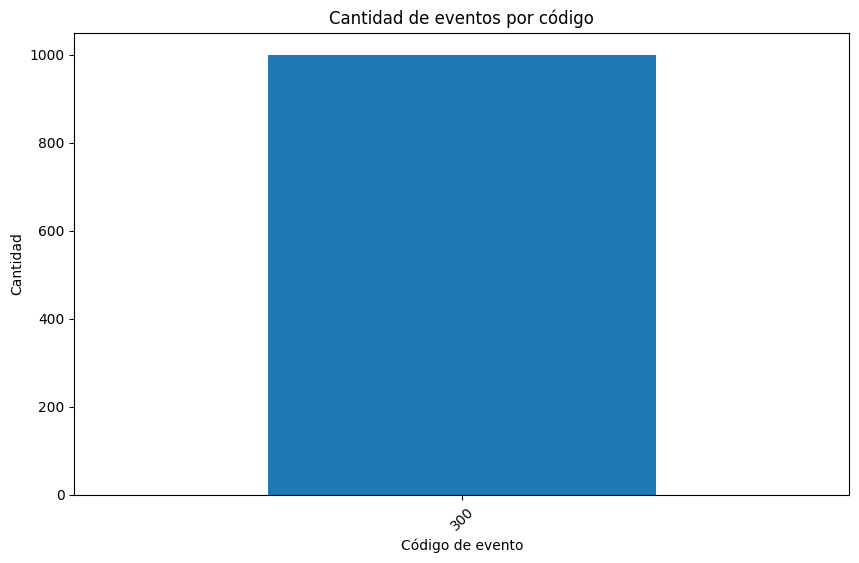

In [ ]:
plt.figure(figsize=(10, 6))
eventos_por_codigo.plot(kind='bar')
plt.title('Cantidad de eventos por código')
plt.xlabel('Código de evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Histograma de la edad de los pacientes
*Este histograma muestra la distribución de la edad de los pacientes afectados por los eventos. En el eje x se representa la edad y en el eje y se muestra la frecuencia de aparición de cada rango de edad*

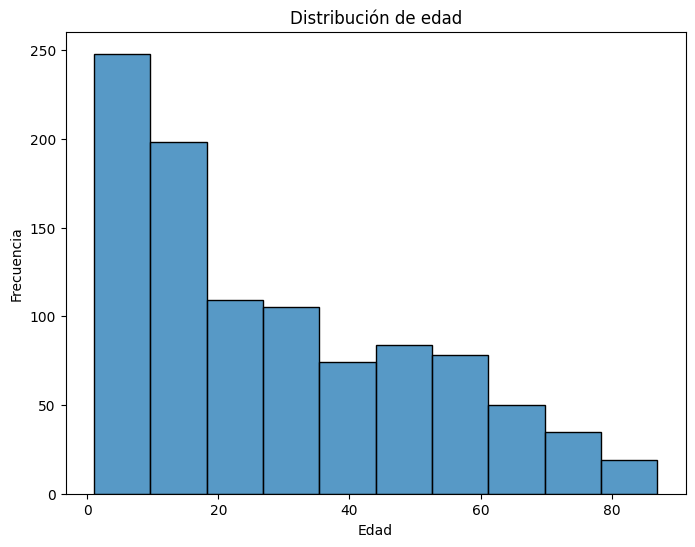

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(animales_rabia['edad'], bins=10)
plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

#Gráfico de pastel de la distribución de género
*Cada porción del pastel representa el porcentaje de pacientes de cada género en relación con el totals*

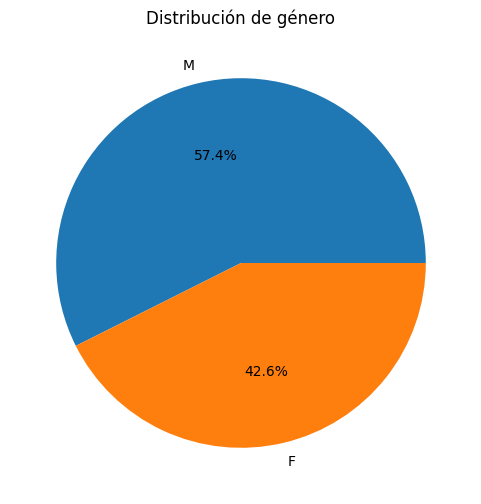

In [ ]:
plt.figure(figsize=(6, 6))
distribucion_genero.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de género')
plt.ylabel('')
plt.show()

# Gráfico de barras de la distribución de áreas
*Este gráfico de barras muestra la cantidad de eventos registrados en cada área*

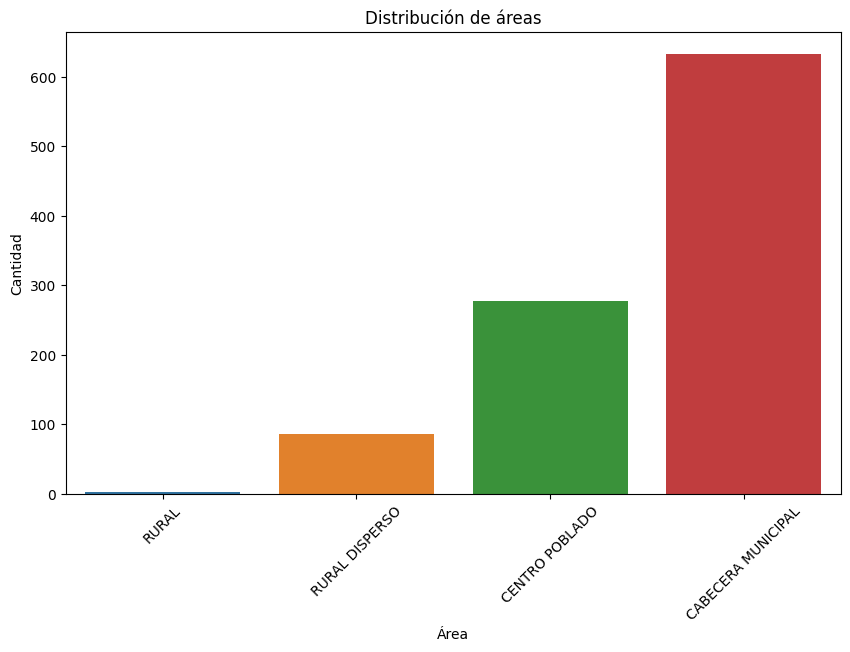

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='area', data=animales_rabia)
plt.title('Distribución de áreas')
plt.xlabel('Área')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Tabla pivote - cantidad de eventos por género y área
tabla_pivote = pd.pivot_table(animales_rabia, index='sexo', columns='area', values='codigo_evento', aggfunc='count')

tabla_pivote_styled = tabla_pivote.style \
    .set_caption('Cantidad de Eventos por Género y Área') \
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '18px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

# Mostrar la tabla pivote
display(tabla_pivote_styled)


area,CABECERA MUNICIPAL,CENTRO POBLADO,RURAL,RURAL DISPERSO
sexo,,,,
F,278.000000,123.000000,nan,25.000000
M,355.000000,155.000000,3.000000,61.000000


In [ ]:
# Agrupación por área y cálculo de la edad promedio
agrupacion_edad_area = animales_rabia.groupby('area')['edad'].mean().reset_index()


agrupacion_edad_area_styled = agrupacion_edad_area.style \
    .set_caption('Edad Promedio por Área') \
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '18px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

# Mostrar la agrupación
display(agrupacion_edad_area_styled)


,area,edad
0,CABECERA MUNICIPAL,29.507109
1,CENTRO POBLADO,25.122302
2,RURAL,29.000000
3,RURAL DISPERSO,31.360465


#**Gracias! link de Git**
https://github.com/Dannap77/Todos_a_la_U/blob/main/Actividad_Dataframes_Pandas.ipynb